<a href="https://colab.research.google.com/github/semesarker/A-Text-Independent-Speech-Emotion-Recognition-Based-on-Convolution-Neural-Network/blob/main/CNN_2D_Model_using_only_MFCC_feature_on_Ravdess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/thesis/RAV.zip'

Archive:  /content/drive/MyDrive/thesis/RAV.zip
   creating: rav/
   creating: rav/Actor_01/
  inflating: rav/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: rav/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: rav/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: rav/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: rav/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-03-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-03-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-03-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-03-02-01-01-01.wav  
  infl

In [ ]:
!unzip '/content/drive/MyDrive/thesis/TESS.zip'

Archive:  /content/drive/MyDrive/thesis/TESS.zip
   creating: TESS/
   creating: TESS/OAF_angry/
  inflating: TESS/OAF_angry/OAF_back_angry.wav  
  inflating: TESS/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS/OAF_angry/OAF_base_angry.wav  
  inflating: TESS/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS/OAF_angry/OAF_book_angry.wav  
  inflating: TESS/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS/OAF_angry/OAF_burn_angry.wav  
  inflating: TESS/OAF_angry/OAF_cab_angry.wav  
  inflating: TESS/OAF_angry/OAF_calm_angry.wav  
  inflating: TESS/OAF_angry/OAF_came_angry.wav  
  inflating: TESS/OAF_angry/OAF_cause_angry.wav  
  inflating: TESS/OAF_angry/OAF_chain_angry.wav  
  inflating: TESS/OAF_angry/OAF_chair_angry.wav  
  inflating: TESS/O

In [ ]:
# Keras
#import tensorflow as tf
from IPython.display import Audio
import keras
from keras import regularizers

from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D,Conv2D,MaxPool2D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Conv2D,Conv2DTranspose, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer


from keras_preprocessing.sequence import pad_sequences


# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Other
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob
import os
import sys
import IPython.display as Audio  # To play sound in the notebook
import warnings

import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os
from tensorflow.keras.optimizers import Adam

# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
Ravdess = '/content/rav'
ravdess_directory_list = os.listdir(Ravdess)
ravdess_directory_list

['Actor_12',
 'Actor_14',
 'Actor_22',
 'Actor_19',
 'Actor_21',
 'Actor_02',
 'Actor_20',
 'Actor_13',
 'Actor_09',
 'Actor_08',
 'Actor_18',
 'Actor_23',
 'Actor_17',
 'Actor_04',
 'Actor_03',
 'Actor_15',
 'Actor_05',
 'Actor_06',
 'Actor_10',
 'Actor_24',
 'Actor_16',
 'Actor_01',
 'Actor_07',
 'Actor_11']

In [ ]:
# Ravdess preprocess
ravdess_directory_list = os.listdir(Ravdess)
file_path = []
file_emotion = []
for directory in ravdess_directory_list:
    # 24 different actors in Ravdess directory needed to be extracted as files for each actor
    actor = os.listdir(Ravdess + '/' + directory)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + '/' + directory + '/' + file)

In [ ]:
file_path

['/content/rav/Actor_12/03-01-08-01-02-01-12.wav',
 '/content/rav/Actor_12/03-01-01-01-02-02-12.wav',
 '/content/rav/Actor_12/03-01-07-02-02-02-12.wav',
 '/content/rav/Actor_12/03-01-02-01-01-02-12.wav',
 '/content/rav/Actor_12/03-01-03-01-02-02-12.wav',
 '/content/rav/Actor_12/03-01-07-01-02-01-12.wav',
 '/content/rav/Actor_12/03-01-02-02-01-01-12.wav',
 '/content/rav/Actor_12/03-01-05-02-01-01-12.wav',
 '/content/rav/Actor_12/03-01-07-01-02-02-12.wav',
 '/content/rav/Actor_12/03-01-05-01-01-02-12.wav',
 '/content/rav/Actor_12/03-01-07-02-01-02-12.wav',
 '/content/rav/Actor_12/03-01-06-01-02-02-12.wav',
 '/content/rav/Actor_12/03-01-03-01-01-02-12.wav',
 '/content/rav/Actor_12/03-01-04-02-02-01-12.wav',
 '/content/rav/Actor_12/03-01-08-01-01-01-12.wav',
 '/content/rav/Actor_12/03-01-01-01-02-01-12.wav',
 '/content/rav/Actor_12/03-01-08-01-01-02-12.wav',
 '/content/rav/Actor_12/03-01-02-02-01-02-12.wav',
 '/content/rav/Actor_12/03-01-06-02-01-01-12.wav',
 '/content/rav/Actor_12/03-01-0

In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# decode integers to actual emotions
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,surprise,/content/rav/Actor_12/03-01-08-01-02-01-12.wav
1,neutral,/content/rav/Actor_12/03-01-01-01-02-02-12.wav
2,disgust,/content/rav/Actor_12/03-01-07-02-02-02-12.wav
3,calm,/content/rav/Actor_12/03-01-02-01-01-02-12.wav
4,happy,/content/rav/Actor_12/03-01-03-01-02-02-12.wav


In [ ]:
Ravdess_df.shape

(1440, 2)

In [ ]:
def match_dimension(data,input_length):

  if len(data) > input_length:
      max_offset = int(len(data) - input_length)
      data = data[0:input_length]
  else:
      max_offset =int(input_length - len(data))
      offset = np.zeros(max_offset)
      data=np.concatenate((data,offset),axis=0)

  return data

In [ ]:
def create_mel_spec(data,sr,e):
    melspec = librosa.feature.melspectrogram(data, n_mels = 30)
    logspec = librosa.amplitude_to_db(melspec)
    plt.figure(figsize=(12,5))
    plt.title('Mel-Spectrogram for {}'.format(e), size=15)
    librosa.display.specshow(logspec, x_axis='time')
    plt.ylabel('MFCC')
    plt.colorbar()

def create_mfcc(data,sr,e):
    mfcc = librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)
    plt.figure(figsize=(12,5))
    plt.title('Mel-frequency cepstral coefficient for {}'.format(e), size=15)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.ylabel('MFCC')
    plt.colorbar()

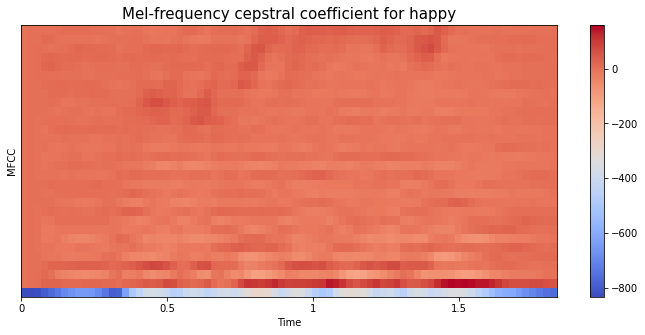

In [ ]:
emotion='happy'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[6]
data, sr = librosa.load(path,sr=16000, offset=0.5, duration=2.5, res_type='kaiser_fast')
create_mfcc(data,sr,emotion)

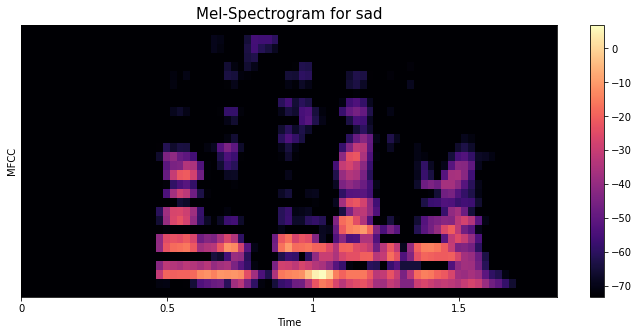

In [ ]:
emotion='sad'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sr = librosa.load(path,sr=16000, offset=0.5, duration=2.5, res_type='kaiser_fast')
create_mel_spec(data,sr,emotion)

In [ ]:
sampling_rate=16000
audio_duration=2.5
n_mfcc = 30
n_melspec = 30
n_fft=512
def prepare_data(df, n, mfcc ,mel):
    X = np.empty(shape=(df.shape[0], n,79,1))
    input_length = sampling_rate * audio_duration

    cnt = 0
    for fname in tqdm(df.Path):
        file_path = fname
        data, sr = librosa.load(file_path, sr=sampling_rate
                               ,res_type="kaiser_fast"
                               ,duration=2.5
                               ,offset=0.5
                              )

        if len(data)!= input_length:

        # Random offset / Padding
            data=match_dimension(data,40000)




          # which feature?
          # if mfcc == 1:
          #       # MFCC extraction
          #   MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
          #   MFCC = np.expand_dims(MFCC, axis=-1)
          #   X[cnt,] = MFCC
          #   print('mfcc',MFCC.shape)

        if mfcc == 1 and mel== 0:
                  # MFCC extraction
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              MFCC = np.expand_dims(MFCC, axis=-1)
              X[cnt,] = MFCC
              print('mfcc',MFCC.shape)

        elif mfcc==0 and mel==1 :
                  # Log-melspectogram

              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate, n_mels = n_melspec)
              logspec = librosa.amplitude_to_db(melspec)
              logspec = np.expand_dims(logspec, axis=-1)
              X[cnt,] = logspec

              print('mel',logspec.shape)

        elif mfcc==1 and mel== 1:
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate, n_mels = n_melspec)
              logspec = librosa.amplitude_to_db(melspec)
              mfcc_logspec= np.concatenate((MFCC,logspec),axis=1)
              #mel_logspec= np.vstack([MFCC,logspec])
              #print(mfcc_logspec.shape)
              mfcc_logspec = np.expand_dims(mfcc_logspec, axis=-1)
              X[cnt,] = mfcc_logspec
              print('mfcc_logspec',mfcc_logspec.shape)

        cnt += 1

    return X

In [ ]:
mfcc=prepare_data(Ravdess_df,n=30,mfcc=1,mel=0)

  0%|          | 3/1440 [00:00<01:12, 19.69it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  0%|          | 7/1440 [00:00<01:17, 18.54it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  1%|          | 11/1440 [00:00<01:17, 18.55it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  1%|          | 15/1440 [00:00<01:16, 18.58it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  1%|▏         | 19/1440 [00:01<01:21, 17.43it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  2%|▏         | 23/1440 [00:01<01:19, 17.72it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  2%|▏         | 27/1440 [00:01<01:19, 17.77it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  2%|▏         | 31/1440 [00:01<01:18, 17.89it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  2%|▏         | 35/1440 [00:01<01:19, 17.76it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  3%|▎         | 39/1440 [00:02<01:21, 17.10it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  3%|▎         | 43/1440 [00:02<01:19, 17.58it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  3%|▎         | 47/1440 [00:02<01:17, 18.00it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  4%|▎         | 51/1440 [00:02<01:16, 18.16it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  4%|▍         | 55/1440 [00:03<01:17, 17.83it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  4%|▍         | 59/1440 [00:03<01:17, 17.76it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  4%|▍         | 63/1440 [00:03<01:16, 17.97it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  5%|▍         | 67/1440 [00:03<01:16, 18.04it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  5%|▍         | 71/1440 [00:03<01:15, 18.09it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  5%|▌         | 75/1440 [00:04<01:15, 18.03it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  5%|▌         | 79/1440 [00:04<01:14, 18.24it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  6%|▌         | 83/1440 [00:04<01:15, 17.94it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  6%|▌         | 87/1440 [00:04<01:14, 18.05it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  6%|▋         | 91/1440 [00:05<01:20, 16.80it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  7%|▋         | 95/1440 [00:05<01:17, 17.31it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  7%|▋         | 99/1440 [00:05<01:15, 17.66it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  7%|▋         | 103/1440 [00:05<01:15, 17.82it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  7%|▋         | 107/1440 [00:06<01:15, 17.56it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  8%|▊         | 111/1440 [00:06<01:16, 17.45it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  8%|▊         | 115/1440 [00:06<01:15, 17.45it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  8%|▊         | 119/1440 [00:06<01:13, 17.86it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  9%|▊         | 123/1440 [00:06<01:14, 17.77it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  9%|▉         | 127/1440 [00:07<01:16, 17.26it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  9%|▉         | 131/1440 [00:07<01:15, 17.42it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  9%|▉         | 135/1440 [00:07<01:13, 17.69it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 10%|▉         | 139/1440 [00:07<01:12, 17.82it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 10%|▉         | 143/1440 [00:08<01:13, 17.73it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 10%|█         | 147/1440 [00:08<01:12, 17.83it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 10%|█         | 151/1440 [00:08<01:11, 18.04it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 11%|█         | 155/1440 [00:08<01:11, 18.09it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 11%|█         | 159/1440 [00:08<01:10, 18.24it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 11%|█▏        | 163/1440 [00:09<01:11, 17.83it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 12%|█▏        | 167/1440 [00:09<01:12, 17.61it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 12%|█▏        | 171/1440 [00:09<01:11, 17.74it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 12%|█▏        | 175/1440 [00:09<01:11, 17.62it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 12%|█▏        | 179/1440 [00:10<01:12, 17.37it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 13%|█▎        | 183/1440 [00:10<01:12, 17.23it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 13%|█▎        | 187/1440 [00:10<01:10, 17.82it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 13%|█▎        | 191/1440 [00:10<01:09, 18.10it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 14%|█▎        | 195/1440 [00:10<01:07, 18.34it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 14%|█▍        | 199/1440 [00:11<01:08, 18.22it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 14%|█▍        | 203/1440 [00:11<01:09, 17.90it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 14%|█▍        | 207/1440 [00:11<01:07, 18.17it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 15%|█▍        | 211/1440 [00:11<01:08, 17.88it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 15%|█▍        | 215/1440 [00:12<01:17, 15.74it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 15%|█▌        | 217/1440 [00:12<01:21, 15.03it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 15%|█▌        | 221/1440 [00:12<01:18, 15.60it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 16%|█▌        | 225/1440 [00:12<01:13, 16.54it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 16%|█▌        | 229/1440 [00:13<01:11, 16.83it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 16%|█▌        | 233/1440 [00:13<01:09, 17.26it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 16%|█▋        | 237/1440 [00:13<01:09, 17.30it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 17%|█▋        | 241/1440 [00:13<01:06, 17.97it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 17%|█▋        | 245/1440 [00:13<01:05, 18.27it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 17%|█▋        | 249/1440 [00:14<01:05, 18.29it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 18%|█▊        | 253/1440 [00:14<01:07, 17.60it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 18%|█▊        | 257/1440 [00:14<01:05, 18.19it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 18%|█▊        | 261/1440 [00:14<01:03, 18.57it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 18%|█▊        | 265/1440 [00:14<01:03, 18.52it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 19%|█▊        | 269/1440 [00:15<01:03, 18.51it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 19%|█▉        | 273/1440 [00:15<01:04, 17.98it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 19%|█▉        | 277/1440 [00:15<01:05, 17.83it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 20%|█▉        | 281/1440 [00:15<01:03, 18.30it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 20%|█▉        | 285/1440 [00:16<01:02, 18.41it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 20%|██        | 289/1440 [00:16<01:03, 18.14it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 20%|██        | 293/1440 [00:16<01:06, 17.36it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 21%|██        | 297/1440 [00:16<01:03, 18.04it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 21%|██        | 301/1440 [00:16<01:03, 17.97it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 21%|██        | 305/1440 [00:17<01:02, 18.05it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 21%|██▏       | 309/1440 [00:17<01:04, 17.62it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 22%|██▏       | 313/1440 [00:17<01:03, 17.66it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 22%|██▏       | 317/1440 [00:17<01:02, 17.84it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 22%|██▏       | 321/1440 [00:18<01:04, 17.30it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 23%|██▎       | 325/1440 [00:18<01:05, 17.06it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 23%|██▎       | 329/1440 [00:18<01:03, 17.48it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 23%|██▎       | 333/1440 [00:18<01:02, 17.70it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 23%|██▎       | 337/1440 [00:19<01:05, 16.92it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 24%|██▎       | 341/1440 [00:19<01:06, 16.52it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 24%|██▍       | 345/1440 [00:19<01:06, 16.52it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 24%|██▍       | 349/1440 [00:19<01:03, 17.24it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 25%|██▍       | 353/1440 [00:20<01:01, 17.64it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 25%|██▍       | 357/1440 [00:20<01:01, 17.47it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 25%|██▌       | 361/1440 [00:20<01:04, 16.76it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 25%|██▌       | 365/1440 [00:20<01:01, 17.62it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 26%|██▌       | 369/1440 [00:20<00:58, 18.17it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 26%|██▌       | 373/1440 [00:21<00:59, 18.02it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 26%|██▌       | 377/1440 [00:21<00:58, 18.10it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 26%|██▋       | 381/1440 [00:21<00:58, 18.10it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 27%|██▋       | 385/1440 [00:21<00:57, 18.47it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 27%|██▋       | 389/1440 [00:22<00:57, 18.24it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 27%|██▋       | 393/1440 [00:22<00:57, 18.32it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 28%|██▊       | 397/1440 [00:22<00:57, 18.00it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 28%|██▊       | 401/1440 [00:22<00:58, 17.78it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 28%|██▊       | 405/1440 [00:22<00:57, 17.98it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 28%|██▊       | 409/1440 [00:23<00:56, 18.12it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 29%|██▊       | 413/1440 [00:23<00:57, 17.85it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 29%|██▉       | 417/1440 [00:23<00:59, 17.25it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 29%|██▉       | 421/1440 [00:23<00:56, 17.94it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 30%|██▉       | 425/1440 [00:24<00:55, 18.33it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 30%|██▉       | 429/1440 [00:24<00:55, 18.35it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 30%|███       | 433/1440 [00:24<00:54, 18.38it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 30%|███       | 437/1440 [00:24<00:55, 18.14it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 31%|███       | 441/1440 [00:24<00:54, 18.27it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 31%|███       | 445/1440 [00:25<00:54, 18.11it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 31%|███       | 449/1440 [00:25<00:54, 18.33it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 31%|███▏      | 453/1440 [00:25<00:53, 18.33it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 32%|███▏      | 457/1440 [00:25<00:55, 17.59it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 32%|███▏      | 461/1440 [00:26<00:55, 17.66it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 32%|███▏      | 465/1440 [00:26<00:54, 17.86it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 33%|███▎      | 469/1440 [00:26<00:54, 17.79it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 33%|███▎      | 473/1440 [00:26<00:55, 17.48it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 33%|███▎      | 477/1440 [00:26<00:53, 17.88it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 33%|███▎      | 481/1440 [00:27<00:53, 17.81it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 34%|███▎      | 485/1440 [00:27<00:53, 17.80it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 34%|███▍      | 489/1440 [00:27<00:52, 18.07it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 34%|███▍      | 493/1440 [00:27<00:52, 18.04it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 35%|███▍      | 497/1440 [00:28<00:51, 18.35it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 35%|███▍      | 501/1440 [00:28<00:50, 18.75it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 35%|███▌      | 505/1440 [00:28<00:49, 18.81it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 35%|███▌      | 509/1440 [00:28<00:49, 18.87it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 36%|███▌      | 513/1440 [00:28<00:50, 18.33it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 36%|███▌      | 517/1440 [00:29<00:49, 18.52it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 36%|███▌      | 521/1440 [00:29<00:49, 18.61it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 36%|███▋      | 525/1440 [00:29<00:50, 18.21it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 37%|███▋      | 529/1440 [00:29<00:51, 17.85it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 37%|███▋      | 533/1440 [00:29<00:49, 18.14it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 37%|███▋      | 537/1440 [00:30<00:49, 18.19it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 38%|███▊      | 541/1440 [00:30<00:50, 17.76it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 38%|███▊      | 545/1440 [00:30<00:50, 17.82it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 38%|███▊      | 549/1440 [00:30<00:50, 17.67it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 38%|███▊      | 553/1440 [00:31<00:50, 17.55it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 39%|███▊      | 557/1440 [00:31<00:50, 17.54it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 39%|███▉      | 561/1440 [00:31<00:51, 17.20it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 39%|███▉      | 565/1440 [00:31<00:52, 16.69it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 40%|███▉      | 569/1440 [00:32<00:51, 17.05it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 40%|███▉      | 573/1440 [00:32<00:49, 17.55it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 40%|████      | 577/1440 [00:32<00:50, 17.12it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 40%|████      | 581/1440 [00:32<00:48, 17.82it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 41%|████      | 585/1440 [00:32<00:48, 17.58it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 41%|████      | 589/1440 [00:33<00:47, 17.73it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 41%|████      | 593/1440 [00:33<00:46, 18.05it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 41%|████▏     | 597/1440 [00:33<00:46, 18.30it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 42%|████▏     | 601/1440 [00:33<00:47, 17.78it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 42%|████▏     | 605/1440 [00:34<00:46, 17.82it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 42%|████▏     | 609/1440 [00:34<00:46, 17.95it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 43%|████▎     | 613/1440 [00:34<00:46, 17.97it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 43%|████▎     | 617/1440 [00:34<00:46, 17.70it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 43%|████▎     | 621/1440 [00:34<00:46, 17.43it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 43%|████▎     | 625/1440 [00:35<00:45, 18.04it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 44%|████▎     | 629/1440 [00:35<00:44, 18.22it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 44%|████▍     | 633/1440 [00:35<00:44, 17.99it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 44%|████▍     | 637/1440 [00:35<00:46, 17.13it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 45%|████▍     | 641/1440 [00:36<00:47, 16.90it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 45%|████▍     | 645/1440 [00:36<00:46, 17.20it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 45%|████▌     | 649/1440 [00:36<00:45, 17.42it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 45%|████▌     | 653/1440 [00:36<00:43, 17.99it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 46%|████▌     | 657/1440 [00:37<00:44, 17.57it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 46%|████▌     | 661/1440 [00:37<00:44, 17.65it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 46%|████▌     | 665/1440 [00:37<00:43, 17.70it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 46%|████▋     | 669/1440 [00:37<00:43, 17.64it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 47%|████▋     | 673/1440 [00:37<00:45, 16.98it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 47%|████▋     | 677/1440 [00:38<00:44, 17.18it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 47%|████▋     | 681/1440 [00:38<00:43, 17.64it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 48%|████▊     | 685/1440 [00:38<00:41, 18.00it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 48%|████▊     | 689/1440 [00:38<00:41, 18.06it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 48%|████▊     | 693/1440 [00:39<00:41, 17.92it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 48%|████▊     | 697/1440 [00:39<00:41, 17.78it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 49%|████▊     | 701/1440 [00:39<00:41, 17.76it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 49%|████▉     | 705/1440 [00:39<00:41, 17.68it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 49%|████▉     | 709/1440 [00:40<00:43, 16.88it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 50%|████▉     | 713/1440 [00:40<00:42, 17.22it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 50%|████▉     | 717/1440 [00:40<00:41, 17.52it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 50%|█████     | 721/1440 [00:40<00:40, 17.56it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 50%|█████     | 725/1440 [00:40<00:40, 17.52it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 51%|█████     | 729/1440 [00:41<00:42, 16.54it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 51%|█████     | 733/1440 [00:41<00:41, 16.84it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 51%|█████     | 737/1440 [00:41<00:41, 17.12it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 51%|█████▏    | 741/1440 [00:41<00:41, 16.71it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 52%|█████▏    | 745/1440 [00:42<00:40, 17.06it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 52%|█████▏    | 749/1440 [00:42<00:40, 17.09it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 52%|█████▏    | 753/1440 [00:42<00:41, 16.44it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 53%|█████▎    | 757/1440 [00:42<00:40, 16.66it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 53%|█████▎    | 761/1440 [00:43<00:41, 16.24it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 53%|█████▎    | 765/1440 [00:43<00:40, 16.77it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 53%|█████▎    | 769/1440 [00:43<00:40, 16.52it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 54%|█████▎    | 773/1440 [00:43<00:38, 17.17it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 54%|█████▍    | 777/1440 [00:44<00:38, 17.32it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 54%|█████▍    | 781/1440 [00:44<00:38, 16.98it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 55%|█████▍    | 785/1440 [00:44<00:37, 17.38it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 55%|█████▍    | 789/1440 [00:44<00:36, 17.76it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 55%|█████▌    | 793/1440 [00:44<00:35, 18.00it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 55%|█████▌    | 797/1440 [00:45<00:36, 17.38it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 56%|█████▌    | 801/1440 [00:45<00:35, 18.04it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 56%|█████▌    | 805/1440 [00:45<00:35, 17.93it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 56%|█████▌    | 809/1440 [00:45<00:36, 17.28it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 56%|█████▋    | 813/1440 [00:46<00:37, 16.87it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 57%|█████▋    | 817/1440 [00:46<00:36, 17.18it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 57%|█████▋    | 821/1440 [00:46<00:36, 17.11it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 57%|█████▋    | 825/1440 [00:46<00:36, 16.99it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 58%|█████▊    | 829/1440 [00:47<00:37, 16.12it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 58%|█████▊    | 833/1440 [00:47<00:37, 16.27it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 58%|█████▊    | 837/1440 [00:47<00:37, 15.91it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 58%|█████▊    | 841/1440 [00:47<00:36, 16.28it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 59%|█████▊    | 845/1440 [00:48<00:35, 16.81it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 59%|█████▉    | 849/1440 [00:48<00:38, 15.51it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 59%|█████▉    | 853/1440 [00:48<00:35, 16.53it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 60%|█████▉    | 857/1440 [00:48<00:35, 16.27it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 60%|█████▉    | 861/1440 [00:49<00:34, 16.94it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 60%|██████    | 865/1440 [00:49<00:33, 17.20it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 60%|██████    | 869/1440 [00:49<00:32, 17.34it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 61%|██████    | 873/1440 [00:49<00:32, 17.61it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 61%|██████    | 877/1440 [00:49<00:31, 17.65it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 61%|██████    | 881/1440 [00:50<00:31, 17.84it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 61%|██████▏   | 885/1440 [00:50<00:31, 17.61it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 62%|██████▏   | 889/1440 [00:50<00:31, 17.64it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 62%|██████▏   | 893/1440 [00:50<00:30, 17.89it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 62%|██████▏   | 897/1440 [00:51<00:30, 18.01it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 63%|██████▎   | 901/1440 [00:51<00:31, 16.91it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 63%|██████▎   | 905/1440 [00:51<00:30, 17.63it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 63%|██████▎   | 909/1440 [00:51<00:30, 17.58it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 63%|██████▎   | 913/1440 [00:51<00:29, 18.00it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 64%|██████▎   | 917/1440 [00:52<00:29, 17.70it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 64%|██████▍   | 921/1440 [00:52<00:29, 17.35it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 64%|██████▍   | 925/1440 [00:52<00:31, 16.58it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 65%|██████▍   | 929/1440 [00:52<00:30, 16.86it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 65%|██████▍   | 933/1440 [00:53<00:29, 17.43it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 65%|██████▌   | 937/1440 [00:53<00:30, 16.65it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 65%|██████▌   | 941/1440 [00:53<00:29, 16.80it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 66%|██████▌   | 945/1440 [00:53<00:29, 16.51it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 66%|██████▌   | 949/1440 [00:54<00:29, 16.71it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 66%|██████▌   | 953/1440 [00:54<00:28, 17.09it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 66%|██████▋   | 957/1440 [00:54<00:28, 17.06it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 67%|██████▋   | 961/1440 [00:54<00:27, 17.24it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 67%|██████▋   | 965/1440 [00:55<00:27, 17.42it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 67%|██████▋   | 969/1440 [00:55<00:27, 17.39it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 68%|██████▊   | 973/1440 [00:55<00:26, 17.45it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 68%|██████▊   | 977/1440 [00:55<00:25, 18.12it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 68%|██████▊   | 981/1440 [00:55<00:26, 17.61it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 68%|██████▊   | 985/1440 [00:56<00:26, 17.44it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 69%|██████▊   | 989/1440 [00:56<00:26, 17.17it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 69%|██████▉   | 993/1440 [00:56<00:25, 17.43it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 69%|██████▉   | 997/1440 [00:56<00:24, 17.89it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 70%|██████▉   | 1001/1440 [00:57<00:24, 17.99it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 70%|██████▉   | 1005/1440 [00:57<00:23, 18.18it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 70%|███████   | 1009/1440 [00:57<00:24, 17.38it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 70%|███████   | 1013/1440 [00:57<00:24, 17.65it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 71%|███████   | 1017/1440 [00:57<00:23, 18.01it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 71%|███████   | 1021/1440 [00:58<00:23, 17.99it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 71%|███████   | 1025/1440 [00:58<00:23, 17.81it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 71%|███████▏  | 1029/1440 [00:58<00:23, 17.64it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 72%|███████▏  | 1033/1440 [00:58<00:22, 17.96it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 72%|███████▏  | 1037/1440 [00:59<00:22, 18.02it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 72%|███████▏  | 1041/1440 [00:59<00:22, 17.83it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 72%|███████▏  | 1043/1440 [00:59<00:22, 17.39it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 73%|███████▎  | 1047/1440 [00:59<00:24, 16.33it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 73%|███████▎  | 1051/1440 [00:59<00:23, 16.64it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 73%|███████▎  | 1055/1440 [01:00<00:22, 16.85it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 74%|███████▎  | 1059/1440 [01:00<00:22, 16.80it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 74%|███████▍  | 1063/1440 [01:00<00:22, 16.84it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 74%|███████▍  | 1067/1440 [01:00<00:21, 17.15it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 74%|███████▍  | 1071/1440 [01:01<00:21, 17.17it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 75%|███████▍  | 1075/1440 [01:01<00:21, 17.01it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 75%|███████▍  | 1079/1440 [01:01<00:21, 17.19it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 75%|███████▌  | 1083/1440 [01:01<00:20, 17.32it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 75%|███████▌  | 1087/1440 [01:02<00:20, 17.51it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 76%|███████▌  | 1091/1440 [01:02<00:19, 17.67it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 76%|███████▌  | 1095/1440 [01:02<00:19, 17.73it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 76%|███████▌  | 1097/1440 [01:02<00:19, 17.44it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 76%|███████▋  | 1099/1440 [01:02<00:30, 11.11it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 76%|███████▋  | 1101/1440 [01:03<00:39,  8.60it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 77%|███████▋  | 1105/1440 [01:03<00:35,  9.32it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 77%|███████▋  | 1109/1440 [01:03<00:27, 12.02it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 77%|███████▋  | 1111/1440 [01:04<00:32, 10.16it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 77%|███████▋  | 1113/1440 [01:04<00:39,  8.36it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 77%|███████▋  | 1115/1440 [01:04<00:38,  8.33it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 78%|███████▊  | 1118/1440 [01:05<00:34,  9.42it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 78%|███████▊  | 1122/1440 [01:05<00:25, 12.68it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 78%|███████▊  | 1126/1440 [01:05<00:23, 13.21it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 78%|███████▊  | 1128/1440 [01:05<00:32,  9.58it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 78%|███████▊  | 1130/1440 [01:06<00:38,  8.03it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 79%|███████▉  | 1134/1440 [01:06<00:30, 10.11it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 79%|███████▉  | 1138/1440 [01:06<00:24, 12.44it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 79%|███████▉  | 1142/1440 [01:07<00:21, 14.16it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 80%|███████▉  | 1146/1440 [01:07<00:19, 15.19it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 80%|███████▉  | 1150/1440 [01:07<00:18, 15.60it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 80%|████████  | 1154/1440 [01:07<00:17, 16.52it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 80%|████████  | 1158/1440 [01:08<00:16, 16.85it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 81%|████████  | 1162/1440 [01:08<00:16, 17.33it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 81%|████████  | 1166/1440 [01:08<00:15, 17.51it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 81%|████████▏ | 1170/1440 [01:08<00:15, 17.46it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 82%|████████▏ | 1174/1440 [01:09<00:15, 17.55it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 82%|████████▏ | 1178/1440 [01:09<00:14, 17.73it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 82%|████████▏ | 1182/1440 [01:09<00:14, 17.69it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 82%|████████▏ | 1186/1440 [01:09<00:14, 17.11it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 83%|████████▎ | 1190/1440 [01:09<00:15, 16.50it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 83%|████████▎ | 1194/1440 [01:10<00:14, 16.80it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 83%|████████▎ | 1198/1440 [01:10<00:13, 17.50it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 83%|████████▎ | 1202/1440 [01:10<00:13, 17.66it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 84%|████████▍ | 1206/1440 [01:10<00:13, 17.19it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 84%|████████▍ | 1210/1440 [01:11<00:13, 17.11it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 84%|████████▍ | 1214/1440 [01:11<00:13, 17.29it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 85%|████████▍ | 1218/1440 [01:11<00:12, 17.13it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 85%|████████▍ | 1222/1440 [01:11<00:12, 17.48it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 85%|████████▌ | 1226/1440 [01:12<00:12, 17.07it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 85%|████████▌ | 1230/1440 [01:12<00:12, 17.10it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 86%|████████▌ | 1234/1440 [01:12<00:11, 17.60it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 86%|████████▌ | 1238/1440 [01:12<00:12, 16.57it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 86%|████████▌ | 1240/1440 [01:12<00:13, 15.27it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc

 86%|████████▋ | 1244/1440 [01:13<00:12, 15.53it/s]

 (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 87%|████████▋ | 1248/1440 [01:13<00:11, 16.03it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 87%|████████▋ | 1252/1440 [01:13<00:11, 16.00it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 87%|████████▋ | 1256/1440 [01:13<00:11, 16.60it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 88%|████████▊ | 1260/1440 [01:14<00:10, 16.78it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 88%|████████▊ | 1264/1440 [01:14<00:10, 16.62it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 88%|████████▊ | 1268/1440 [01:14<00:10, 16.88it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 88%|████████▊ | 1272/1440 [01:14<00:09, 17.04it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 89%|████████▊ | 1276/1440 [01:15<00:09, 16.75it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 89%|████████▉ | 1280/1440 [01:15<00:09, 17.18it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 89%|████████▉ | 1284/1440 [01:15<00:08, 17.36it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 89%|████████▉ | 1288/1440 [01:15<00:09, 16.06it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 90%|████████▉ | 1290/1440 [01:15<00:10, 14.89it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 90%|████████▉ | 1294/1440 [01:16<00:09, 15.60it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 90%|█████████ | 1298/1440 [01:16<00:09, 14.98it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 90%|█████████ | 1300/1440 [01:16<00:10, 13.15it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc 

 91%|█████████ | 1304/1440 [01:16<00:09, 15.01it/s]

(30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 91%|█████████ | 1308/1440 [01:17<00:10, 13.00it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 91%|█████████ | 1310/1440 [01:17<00:09, 13.83it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 91%|█████████▏| 1314/1440 [01:17<00:09, 13.51it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 91%|█████████▏| 1316/1440 [01:17<00:09, 13.31it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 92%|█████████▏| 1318/1440 [01:18<00:11, 10.71it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 92%|█████████▏| 1320/1440 [01:18<00:10, 11.49it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 92%|█████████▏| 1322/1440 [01:18<00:11, 10.19it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 92%|█████████▏| 1325/1440 [01:18<00:12,  8.89it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 92%|█████████▏| 1328/1440 [01:19<00:12,  8.87it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 92%|█████████▏| 1330/1440 [01:19<00:13,  7.97it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 92%|█████████▏| 1331/1440 [01:19<00:14,  7.61it/s]

mfcc (30, 79, 1)


 92%|█████████▎| 1332/1440 [01:19<00:17,  6.25it/s]

mfcc (30, 79, 1)


 93%|█████████▎| 1334/1440 [01:20<00:18,  5.71it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 93%|█████████▎| 1336/1440 [01:20<00:18,  5.74it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 93%|█████████▎| 1338/1440 [01:20<00:16,  6.17it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 93%|█████████▎| 1339/1440 [01:21<00:19,  5.22it/s]

mfcc (30, 79, 1)


 93%|█████████▎| 1341/1440 [01:21<00:18,  5.34it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 93%|█████████▎| 1343/1440 [01:21<00:16,  5.90it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 94%|█████████▎| 1347/1440 [01:22<00:08, 10.46it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 94%|█████████▍| 1351/1440 [01:22<00:06, 13.34it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 94%|█████████▍| 1353/1440 [01:22<00:10,  8.59it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc

 94%|█████████▍| 1357/1440 [01:23<00:08, 10.31it/s]

 (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 95%|█████████▍| 1361/1440 [01:23<00:06, 12.70it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 95%|█████████▍| 1365/1440 [01:23<00:05, 14.56it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 95%|█████████▌| 1369/1440 [01:23<00:04, 16.02it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 95%|█████████▌| 1373/1440 [01:24<00:03, 16.85it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 96%|█████████▌| 1377/1440 [01:24<00:03, 16.87it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 96%|█████████▌| 1381/1440 [01:24<00:03, 16.92it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 96%|█████████▌| 1385/1440 [01:24<00:03, 16.49it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 96%|█████████▋| 1389/1440 [01:25<00:02, 17.07it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 97%|█████████▋| 1393/1440 [01:25<00:02, 17.41it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 97%|█████████▋| 1397/1440 [01:25<00:02, 17.26it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 97%|█████████▋| 1401/1440 [01:25<00:02, 17.60it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 98%|█████████▊| 1405/1440 [01:25<00:01, 17.70it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 98%|█████████▊| 1409/1440 [01:26<00:01, 17.69it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 98%|█████████▊| 1413/1440 [01:26<00:01, 17.51it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 98%|█████████▊| 1417/1440 [01:26<00:01, 17.84it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 99%|█████████▊| 1421/1440 [01:26<00:01, 18.15it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 99%|█████████▉| 1425/1440 [01:27<00:00, 18.28it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 99%|█████████▉| 1429/1440 [01:27<00:00, 17.78it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


100%|█████████▉| 1433/1440 [01:27<00:00, 17.49it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


100%|█████████▉| 1437/1440 [01:27<00:00, 17.54it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


100%|██████████| 1440/1440 [01:27<00:00, 16.38it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


In [ ]:
# New model
model = Sequential()
model.add(Conv2D(256, (3,3), padding="same",input_shape=(30,79,1)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(8)) # Target class number
model.add(Activation('softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 79, 256)       2560      
                                                                 
 batch_normalization (BatchN  (None, 30, 79, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 79, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 39, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 39, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 39, 128)       2

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
Y = Ravdess_df['Emotions'].values
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
Y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(Ravdess_df[['Emotions']]))
encoded_labels.columns = encoder.get_feature_names(['Emotions'])
encoded_labels

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Emotions_angry,Emotions_calm,Emotions_disgust,Emotions_fear,Emotions_happy,Emotions_neutral,Emotions_sad,Emotions_surprise
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1435,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1436,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1437,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Split between train and test

X_train, X_test1, y_train, y_test1=train_test_split(mfcc
                                                    , encoded_labels
                                                    , test_size=0.3
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.3, random_state=42)
# one hot encode the target
#lb = LabelEncoder()
#y_train = np_utils.to_categorical(lb.fit_transform(y_train))
#y_test = np_utils.to_categorical(lb.fit_transform(y_test))
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(1008, 30, 79, 1) (130, 30, 79, 1) (302, 30, 79, 1) (1008, 8) (130, 8) (302, 8)


In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

In [ ]:
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

In [ ]:
# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_val = (X_val - mean)/std
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(1008, 30, 79, 1) (130, 30, 79, 1) (302, 30, 79, 1) (1008, 8) (130, 8) (302, 8)


In [ ]:
''' Callbacks with Checkpoint'''

keras.backend.clear_session()

accuracy_threshold = 0.93

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model_3.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "/content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
history=model.fit(X_train, y_train, epochs=300,validation_data = (X_val,y_val),callbacks=[checkpoint],batch_size=64)

Epoch 1/300
16/16 [==============================] - ETA: 0s - loss: 2.3385 - accuracy: 0.1637
Epoch 1: val_accuracy improved from -inf to 0.20861, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel.h5
16/16 [==============================] - 14s 239ms/step - loss: 2.3385 - accuracy: 0.1637 - val_loss: 1.9845 - val_accuracy: 0.2086
Epoch 2/300
15/16 [===========================>..] - ETA: 0s - loss: 2.0786 - accuracy: 0.2000
Epoch 2: val_accuracy improved from 0.20861 to 0.23841, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel.h5
16/16 [==============================] - 1s 49ms/step - loss: 2.0718 - accuracy: 0.2034 - val_loss: 2.0104 - val_accuracy: 0.2384
Epoch 3/300
15/16 [===========================>..] - ETA: 0s - loss: 1.9722 - accuracy: 0.2510
Epoch 3: val_accuracy did not improve from 0.23841
16/16 [==============================] - 1s 41ms/step - loss: 1.9791 - accuracy: 0.2510 - val_loss: 2.1503 - val_accuracy: 0.

In [ ]:
# Evaluation
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

5/5 [==============================] - 0s 34ms/step - loss: 0.9650 - accuracy: 0.7846
Accuracy of our model on test data :  78.46153974533081 %


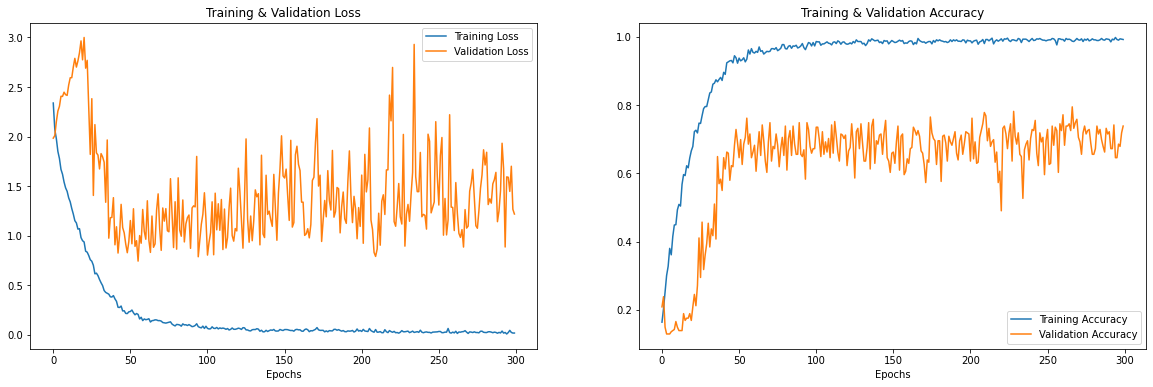

In [ ]:
epochs = [i for i in range(300)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

5/5 [==============================] - 0s 8ms/step


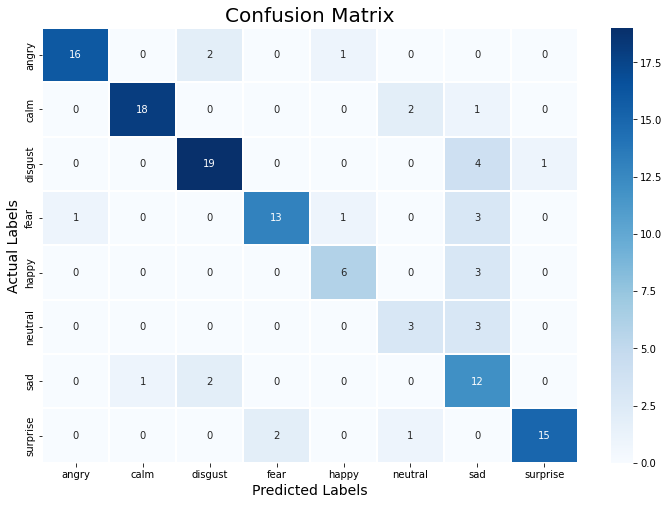

              precision    recall  f1-score   support

       angry       0.94      0.84      0.89        19
        calm       0.95      0.86      0.90        21
     disgust       0.83      0.79      0.81        24
        fear       0.87      0.72      0.79        18
       happy       0.75      0.67      0.71         9
     neutral       0.50      0.50      0.50         6
         sad       0.46      0.80      0.59        15
    surprise       0.94      0.83      0.88        18

    accuracy                           0.78       130
   macro avg       0.78      0.75      0.76       130
weighted avg       0.82      0.78      0.80       130



In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)
#pred_test = pred_test.astype(int).flatten()
y_pred = encoder.inverse_transform(pred_test)

#y_test = y_test.astype(int).flatten()
y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test, y_pred))